# Relationship between Bat Speed and High Performance Metrics
### William Zhao

##### https://www.openbiomechanics.org/ 
##### By: Wasserberger KW, Brady AC, Besky DM, Jones BR, Boddy KJ. The OpenBiomechanics Project: The open source initiative for anonymized, elite-level athletic motion capture data. (2022).

##### This was a small project done as an opportunity to practice my coding skills as well as to begin to dive into the newly released open-source High Performance dataset provided by Driveline Baseball. The goal of this project was to try and begin to understand the relationship between select high performance metrics and bat speed. 


In [84]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import scipy.stats as sp
   

In [86]:
hp = pd.read_csv(
    "C:\\Users\\Willi\\OneDrive\\Desktop\\Data Science Learning\\Baseball Data Project\\HP Data\\hp_obp.csv"
)
print(hp.columns.tolist())

['test_date', 'playing_level', 'bat_speed_mph_group', 'pitch_speed_mph_group', 'jump_height_(imp-mom)_[cm]_mean_cmj', 'lower-limb_stiffness_[n/m]_mean_cmj', 'peak_power_[w]_mean_cmj', 'peak_power_/_bm_[w/kg]_mean_cmj', 'eccentric_braking_rfd_[n/s]_mean_cmj', 'eccentric_duration_[ms]_mean_cmj', 'concentric_duration_[ms]_mean_cmj', 'rsi-modified_[m/s]_mean_cmj', 'countermovement_depth_[cm]_mean_cmj', 'cmj_stiffness_asymmetry_[%_l,r]_mean_cmj', 'eccentric_deceleration_impulse_(asymmetry)_[%_l,r]_mean_cmj', 'p1_concentric_impulse_asymmetry_[%_l,r]_mean_cmj', 'p2_concentric_impulse_asymmetry_[%_l,r]_mean_cmj', 'concentric_peak_force_[n]_mean_cmj', 'eccentric_peak_force_[n]_mean_cmj', 'minimum_eccentric_force_[n]_mean_cmj', 'jump_height_(imp-mom)_[cm]_mean_sj', 'peak_power_[w]_mean_sj', 'peak_power_/_bm_[w/kg]_mean_sj', 'p1_concentric_impulse_asymmetry_[%_l,r]_mean_sj', 'p2_concentric_impulse_asymmetry_[%_l,r]_mean_sj', 'peak_vertical_force_[n]_max_imtp', 'net_peak_vertical_force_[n]_max_imt

**Since the majority of baseball research has seemingly been centered around pitching, I decided to focus my project on hitting.**
**To decide which performance metrics I wanted to focus on, I took inspiration from a recent study done on pelvic energy flow in baseball pitchers that found positive relationships with CMJ power, peak CMJ force, SJ power, jump height, and peak IMTP force.**

*Relationship Between Athlete Performance Metrics And Pelvis Energy Flow In Adult Baseball Pitchers (La Salle, D. Taylor; Hashimoto, Jason, Halligan, Baxter; Aguinaldo, Arnel; Wasserberger, Kyle)*

In [ ]:
# Remove all entries that do not include hitting information
hp_hit = hp.dropna(subset=["bat_speed_mph"])

In [78]:
# Rename columns for formatting and clean data
hp_hit.columns = hp_hit.columns.str.replace(r"[\[\]]", "", regex=True)
hp_hit = hp_hit.rename(
    columns={"jump_height_(imp-mom)_cm_mean_cmj": "jump_height_cmj"}
)
hp_hit = hp_hit.rename(
    columns={"jump_height_(imp-mom)_cm_mean_sj": "jump_height_sj"}
)
# Retrieve variables of interest
hp_vars = [
    "body_weight_lbs",
    "peak_power_w_mean_cmj",
    "concentric_peak_force_n_mean_cmj",
    "peak_power_w_mean_sj",
    "jump_height_cmj",
    "jump_height_sj",
    "peak_vertical_force_n_max_imtp",
]
# Drop any entries missing data
hp_hit = hp_hit.dropna(
    subset=[
        "jump_height_cmj",
        "body_weight_lbs",
        "peak_power_w_mean_cmj",
        "concentric_peak_force_n_mean_cmj",
        "peak_power_w_mean_sj",
        "jump_height_sj",
        "peak_vertical_force_n_max_imtp",
    ]
)

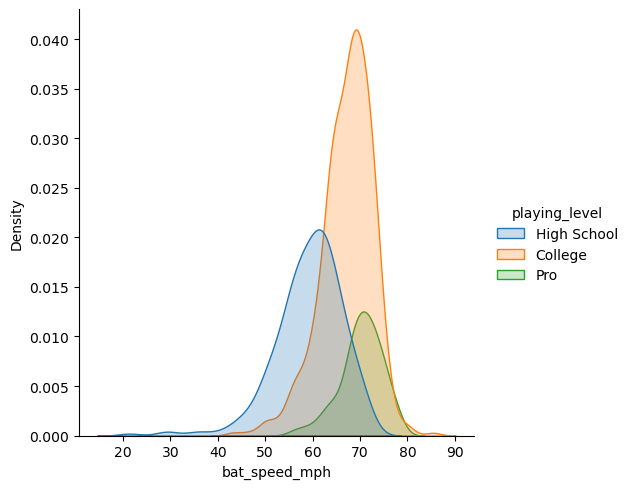

In [67]:
# Plot the univariate distribution of batspeed split by playing level
sns.displot(
    hp_hit, x="bat_speed_mph", hue="playing_level", kind="kde", fill="True"
)

**First I wanted to gain an understanding of the distribution of the data, and as we can see the majority of the athletes were of the College playing level, and lived around the 70mph bat speed.**

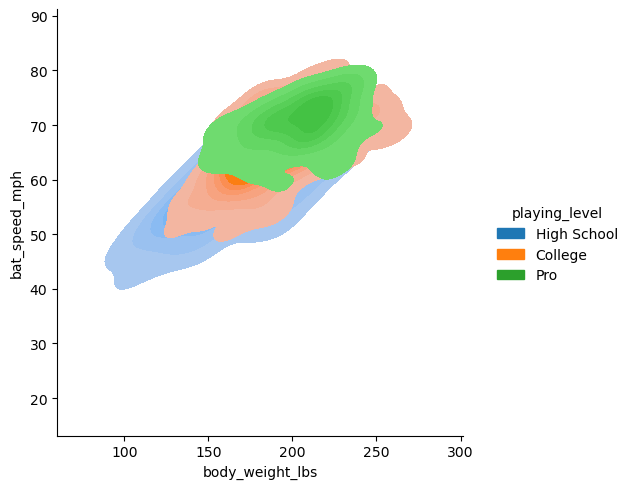

In [15]:
# Plot the bivariate distribution of bat speed + body weight split by playing level
sns.displot(
    hp_hit,
    x="body_weight_lbs",
    y="bat_speed_mph",
    hue="playing_level",
    kind="kde",
    fill="True",
)

**Next, I wanted to visualize the effect that a physical attribute such as body weight would have on bat speed. As we can see, there is some interaction here where as playing level increases, a greater concentration of athletes will tend to have greater body weight and greater bat speed.**

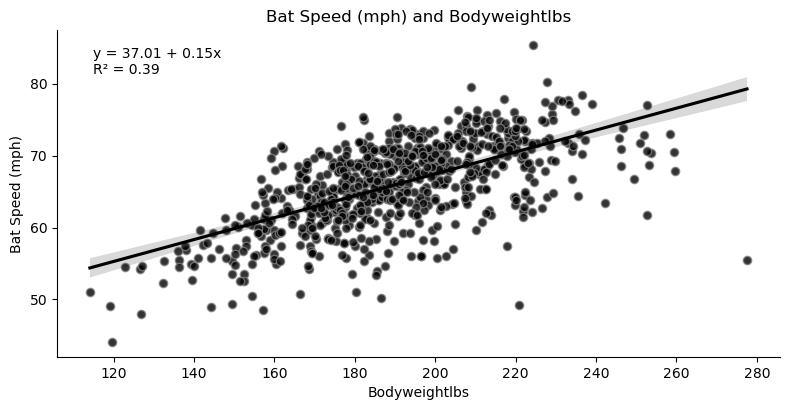

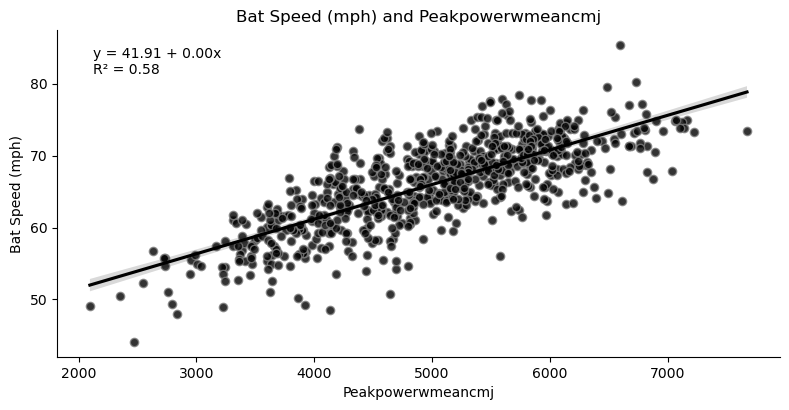

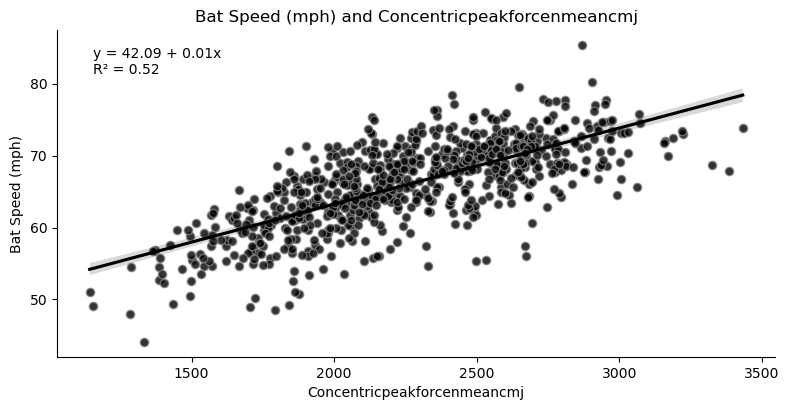

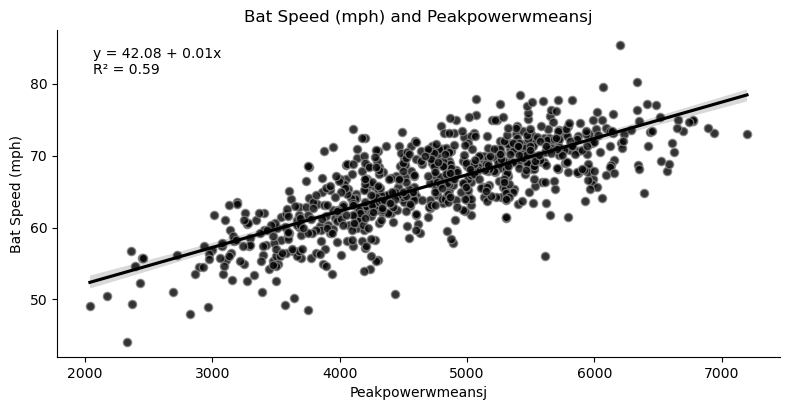

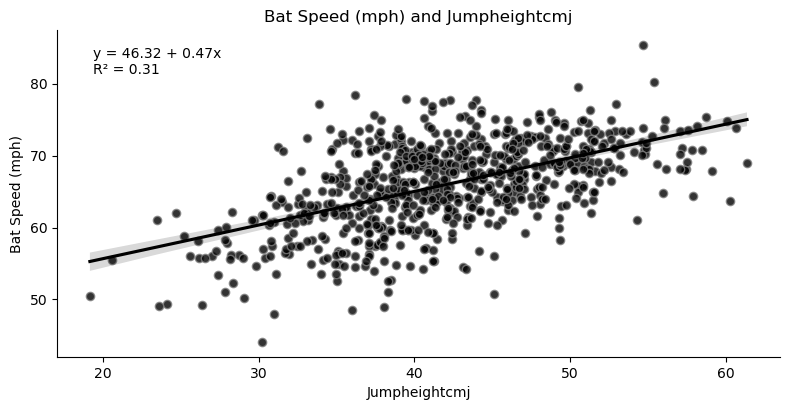

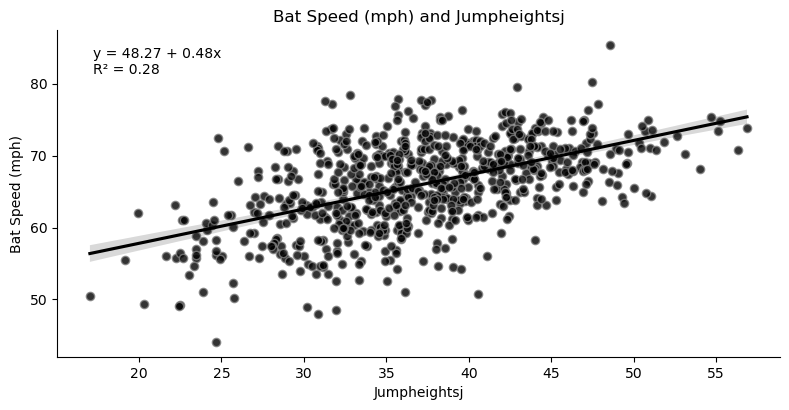

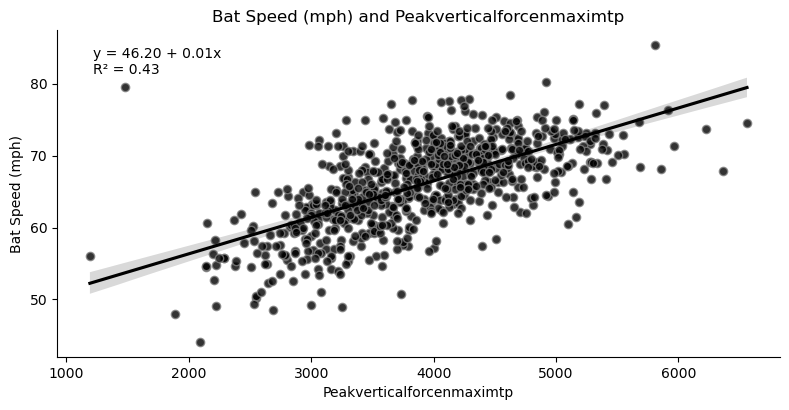

In [80]:
def customize_axes_and_save(x, ax, slope, intercept, r_squared):
    """
    Function to help customize graph aesthetic (x labels, title, etc.)
    """
    plt.title(f"Bat Speed (mph) and {var}")
    plt.ylabel("Bat Speed (mph)")
    plt.xlabel(var)

    # Display regression equation and R-squared on the plot
    ax.text(
        0.05,
        0.95,
        f"y = {intercept:.2f} + {slope:.2f}x\nR² = {r_squared:.2f}",
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
    )
    
    plt.savefig(f"{var}.png", dpi=400, bbox_inches="tight")
    
#Plot the relationship between variables of interest and bat speed
for x in hp_vars:
    var = x.replace("_", "").title()
    y = sns.lmplot(
        data=hp_hit,
        x=x,
        y="bat_speed_mph",
        height=4,
        aspect=2,
        scatter_kws={"color": "black", "edgecolor": "grey"},
        line_kws={"color": "black"},
    )
    ax = y.ax
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = sp.linregress(
        hp_hit[x], hp_hit["bat_speed_mph"]
    )

    # Calculate R-squared
    r_squared = r_value**2

    customize_axes_and_save(x, ax, slope, intercept, r_squared)

**From the above figures, we can see that all our select performance metrics displayed positive relationships with bat speed. However, it was Peak Power in the CMJ and SJ that displayed the strongest relationship with an R^2 of 0.58 and 0.59 respectively.**
**Now this is likely nothing new, but what this reinforces to me is that not only does the amount of force you can put into the ground translate into overall athletic performance and bat speed, but the rate at which you do it will significantly matter as well!**

In [93]:
# OLS regression to evaluate variables of interest
reg_hp = sm.ols(
    formula="bat_speed_mph ~ body_weight_lbs + peak_power_w_mean_cmj + concentric_peak_force_n_mean_cmj + peak_power_w_mean_sj + jump_height_cmj + jump_height_sj + peak_vertical_force_n_max_imtp",
    data=hp_hit,
).fit()
print(reg_hp.summary())


                            OLS Regression Results                            
Dep. Variable:          bat_speed_mph   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     199.1
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          9.71e-165
Time:                        12:38:10   Log-Likelihood:                -1976.5
No. Observations:                 740   AIC:                             3969.
Df Residuals:                     732   BIC:                             4006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

**When the performance metrics were included together in an ordinary least squares regression, we can see that our model was significant, and able to explain 65.6% of the variance in bat speed. Interestingly, some individual metrics showed an insignificant (α = 0.05) effect or even a negative correlation with bat speed. This is most likely due to multicollinearity, where several of our performance metrics are highly correlated with each other, thus leading to overfitting within our model.**

**The main takeaway I had was that an increase in our performance metrics of interest can help in increasing bat speed, but more work would need to be done to fully understand if a specific athlete needs to focus more on peak force or peak power production.**

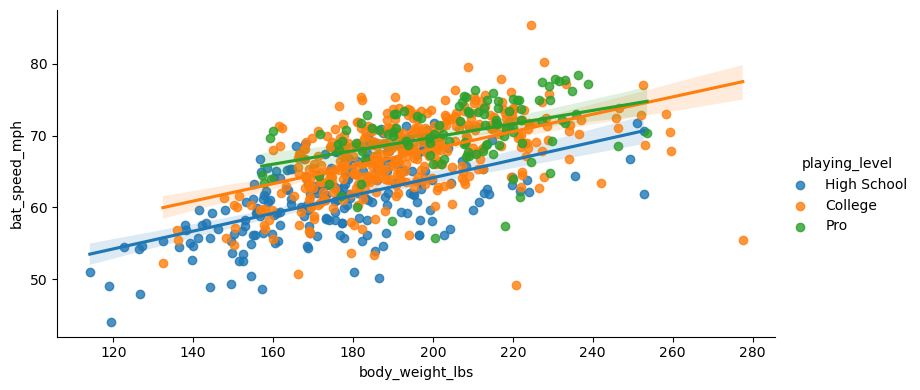

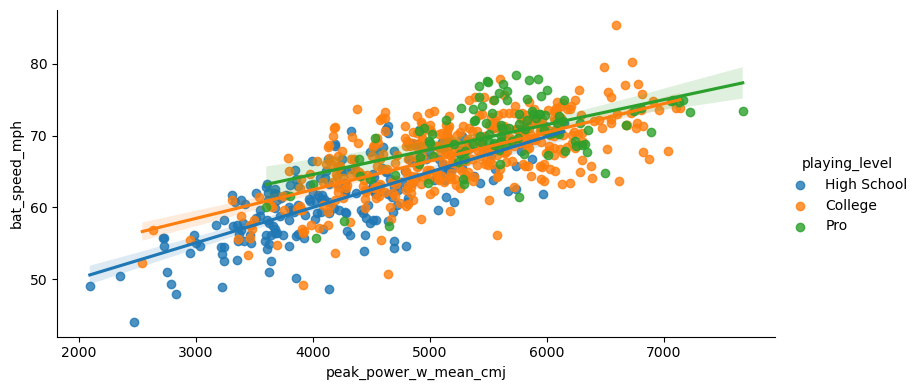

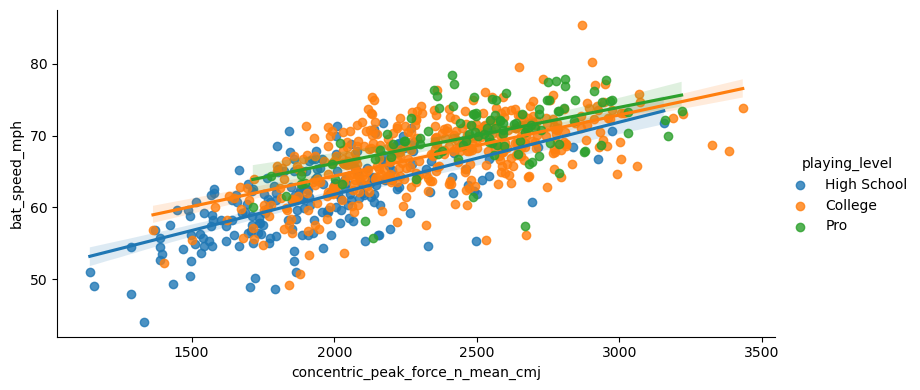

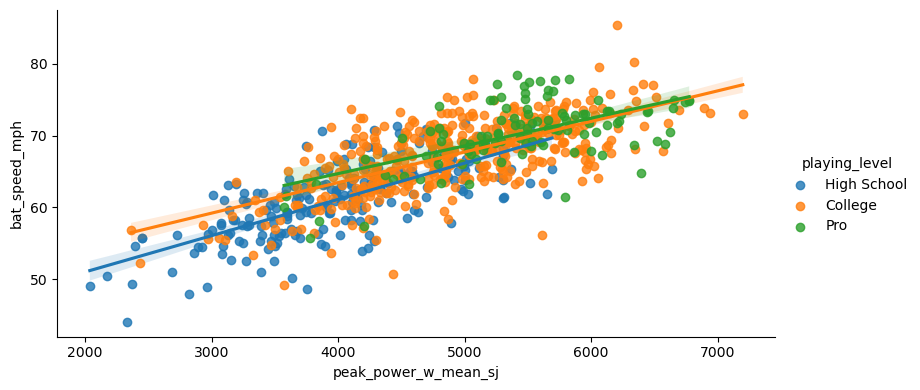

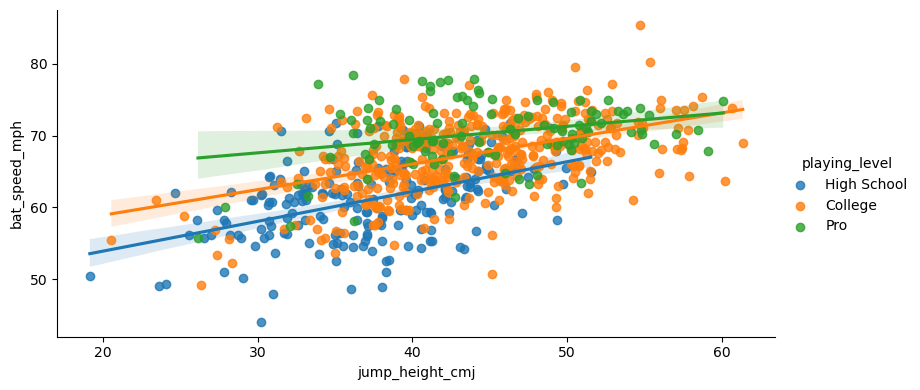

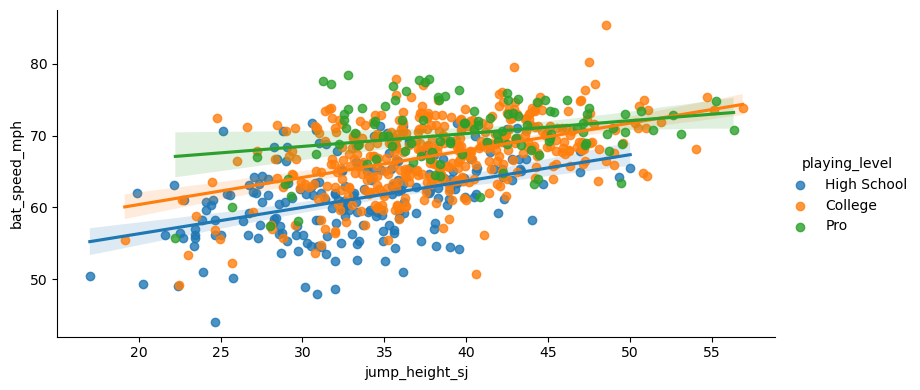

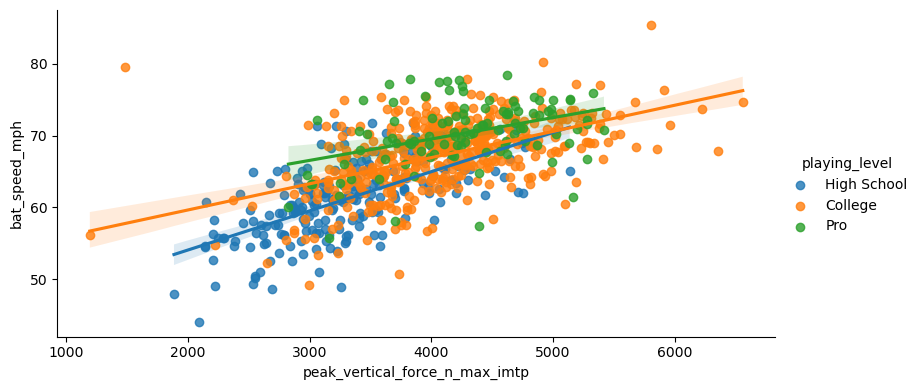

In [105]:
# Plot the relationship between variables of interest and bat speed split by playing level
for x in hp_vars:
    var = x.replace("_", "").title()
    y = sns.lmplot(
        data=hp_hit,
        x=x,
        y="bat_speed_mph",
        hue="playing_level",
        height=4,
        aspect=2,
    )


**The final step I wanted to take was to visualize the same relationships we did previously between our performance metrics and bat speed, but see they changed as a function of playing level.**

**Visually, we see a stepwise increase in 'starting' bat speed as playing level increases, but the same positive relationship exists. Meaning that no matter what level of play you are at, training and increasing these performance metrics can still benefit you in terms of bat speed.**

# Conclusion

##### This small project dived into the High Performance dataset provided by Driveline Baseball and did a surface level analysis on the relationship between select performance metrics and bat speed.
##### The results were promising where unsurprisingly, increases in overall athletic performance seem to be tied to increased bat speed. Interestingly, this positive relationship seemed to be independent of playing level, meaning that athletes of all playing levels could benefit from increases in these performance metrics.
##### In terms of a future direction, an interesting next step would be to take a repeated measures approach to investigate how bat speed would change within athletes as a function of changes in performance metrics!     